In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display 
from IPython.display import Audio
import warnings

# warnings.filterwarnings("ignore")

In [13]:
base_path= "./Dataset"

In [6]:
file_path= []
emotions = []
intensities = []
actors = []

In [8]:
emotion_map= {"01": "neutral",
              "02": "calm",
              "03": "happy",
              "04": "sad",
              "05": "angry",
              "06": "fearful",
              "07": "disgust",
              "08": "surprised"
              }

In [ ]:
for actor_dir in os.listdir(base_path):
    actor_path = os.path.join(base_path, actor_dir)
    if os.path.isdir(actor_path):
        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                parts = file.split(".")[0].split("-")
                modality, channel, emotion_code, intensity, statement, repetition, actor_id = parts
                if modality == "03" and channel == "01":
                    file_path.append(os.path.join(actor_path, file))
                    emotions.append(emotion_map[emotion_code])
                    intensities.append("normal" if intensity== "01" else "strong")
                    actors.append(actor_id)
print("Dataset loaded successfully!")

In [23]:
print(file_path[:5])
print(file_path[-5:])

['./Dataset\\Actor_01\\03-01-01-01-01-01-01.wav', './Dataset\\Actor_01\\03-01-01-01-01-02-01.wav', './Dataset\\Actor_01\\03-01-01-01-02-01-01.wav', './Dataset\\Actor_01\\03-01-01-01-02-02-01.wav', './Dataset\\Actor_01\\03-01-02-01-01-01-01.wav']
['./Dataset\\Actor_24\\03-01-08-01-02-02-24.wav', './Dataset\\Actor_24\\03-01-08-02-01-01-24.wav', './Dataset\\Actor_24\\03-01-08-02-01-02-24.wav', './Dataset\\Actor_24\\03-01-08-02-02-01-24.wav', './Dataset\\Actor_24\\03-01-08-02-02-02-24.wav']


In [26]:
print(emotions[:5])
print(emotions[-5:])

['neutral', 'neutral', 'neutral', 'neutral', 'calm']
['surprised', 'surprised', 'surprised', 'surprised', 'surprised']


In [15]:
df= pd.DataFrame({
    "file_path": file_path,
    "emotion": emotions,
    "intensity": intensities,
    "actor": actors})

In [21]:
print("Total number of files:", len(df))
print(df.head(5))

Total number of files: 1440
                                     file_path  emotion intensity actor
0  ./Dataset\Actor_01\03-01-01-01-01-01-01.wav  neutral    normal    01
1  ./Dataset\Actor_01\03-01-01-01-01-02-01.wav  neutral    normal    01
2  ./Dataset\Actor_01\03-01-01-01-02-01-01.wav  neutral    normal    01
3  ./Dataset\Actor_01\03-01-01-01-02-02-01.wav  neutral    normal    01
4  ./Dataset\Actor_01\03-01-02-01-01-01-01.wav     calm    normal    01


In [19]:
df['emotion'].value_counts()

emotion
calm         192
happy        192
sad          192
angry        192
disgust      192
fearful      192
surprised    192
neutral       96
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

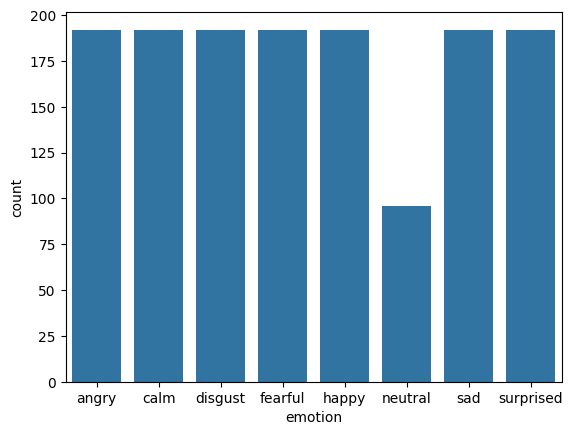

In [20]:
sns.countplot(x='emotion', data=df, order=sorted(df['emotion'].unique()))

In [33]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x= librosa.stft(data)
    Xdb= librosa.amplitude_to_db(np.abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion,size=20)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

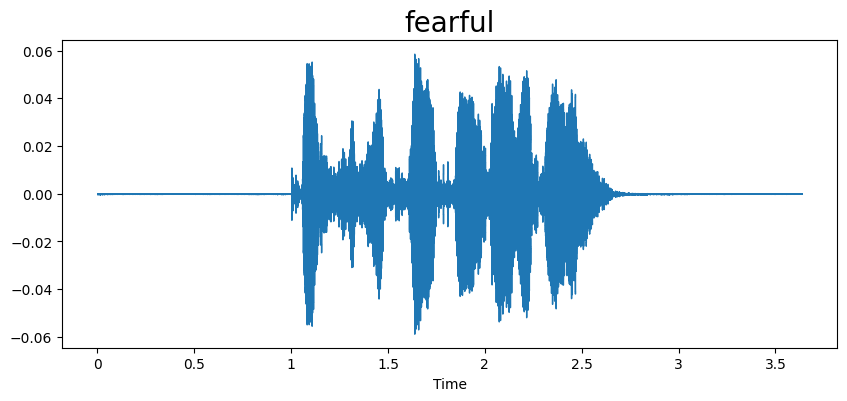

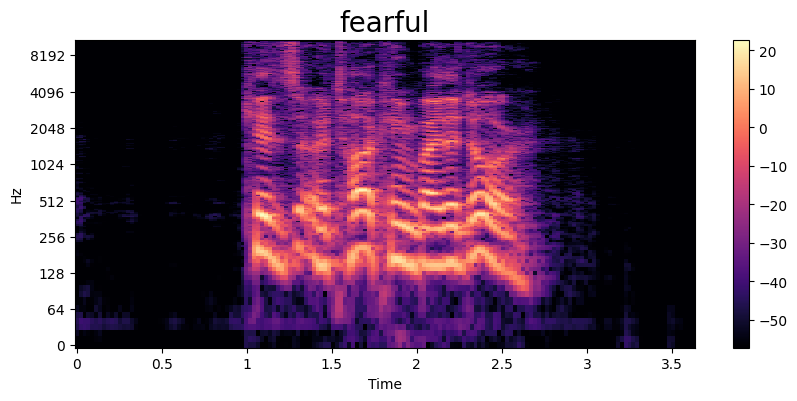

In [34]:
emotion = 'fearful'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

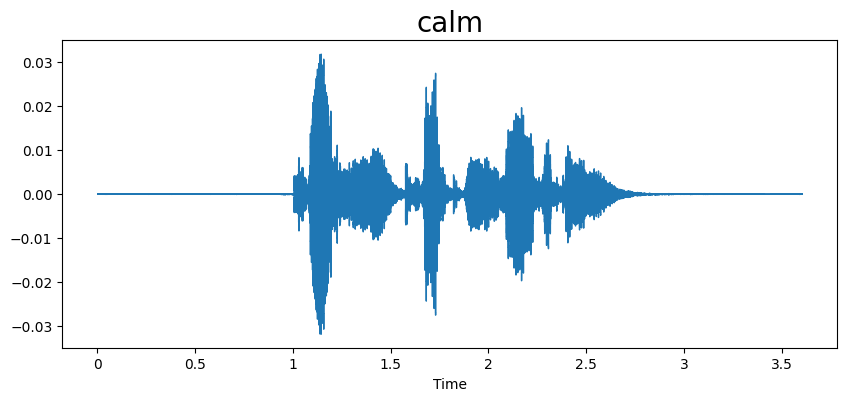

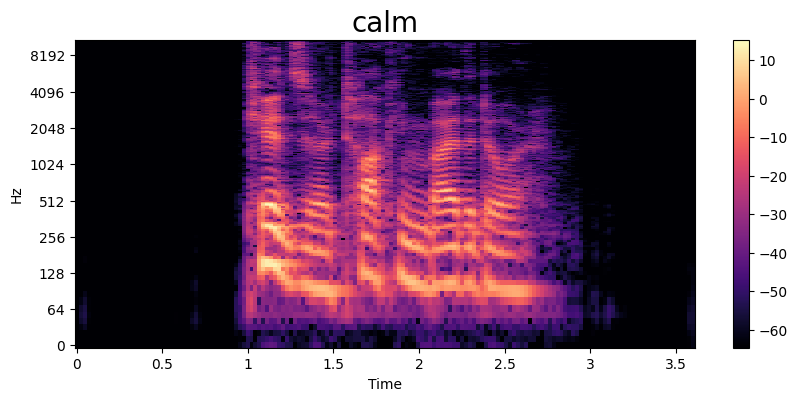

In [35]:
emotion = 'calm'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

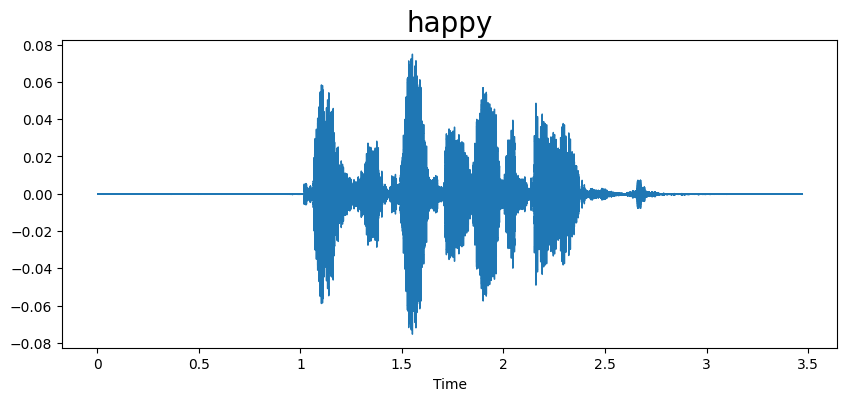

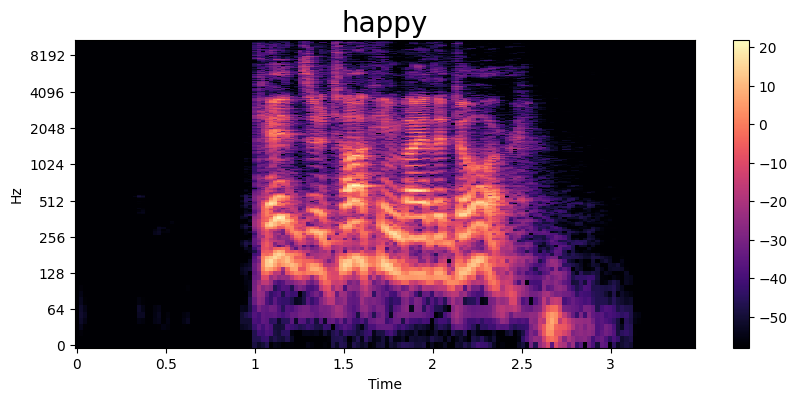

In [36]:
emotion = 'happy'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

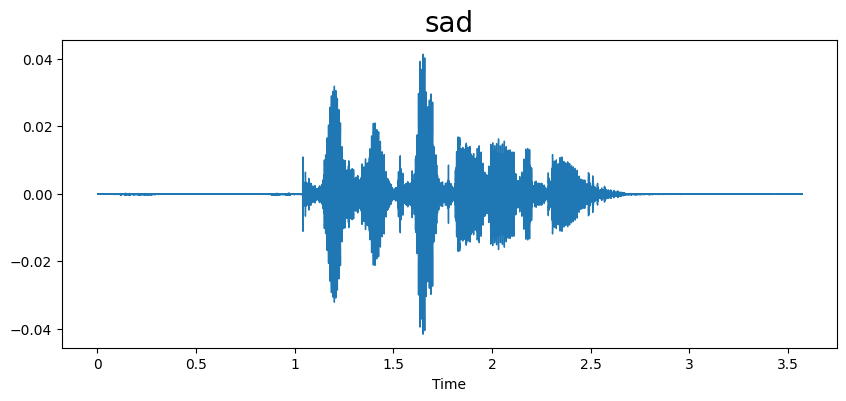

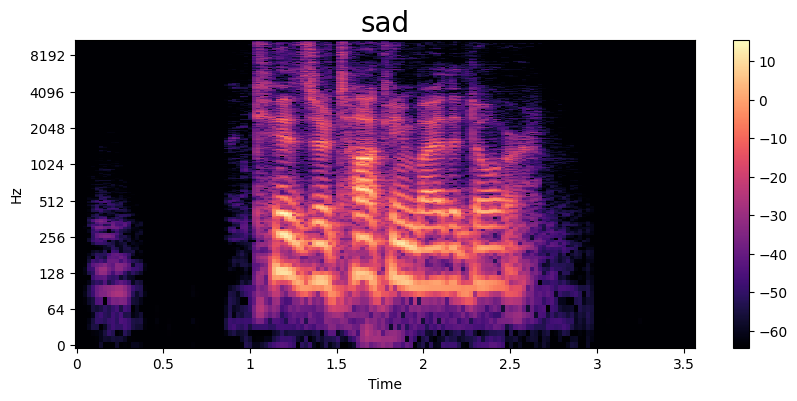

In [37]:
emotion = 'sad'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

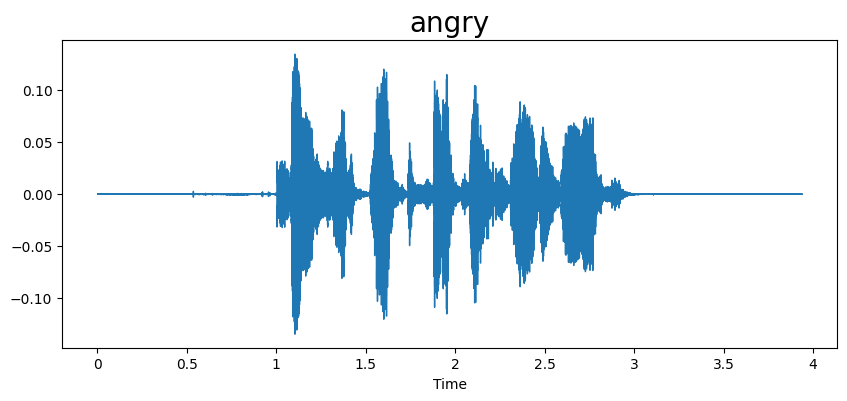

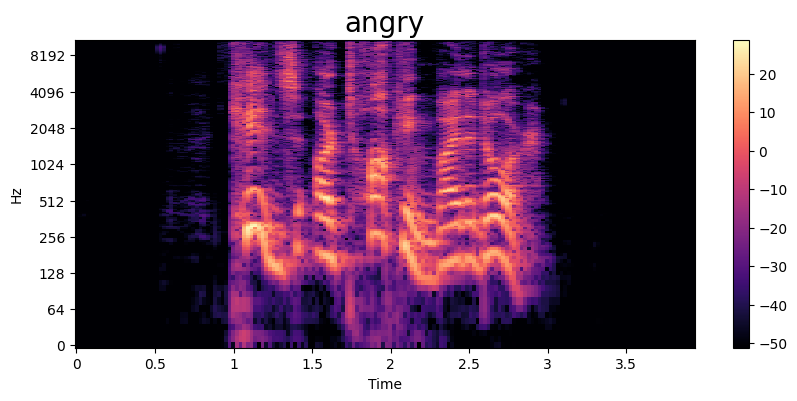

In [38]:
emotion = 'angry'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

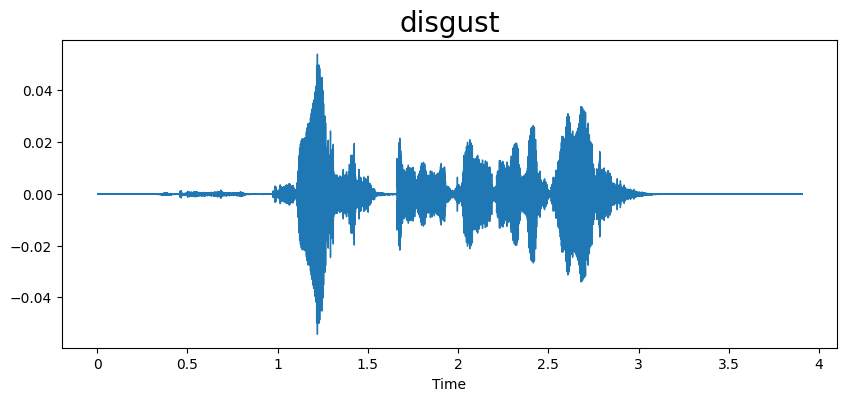

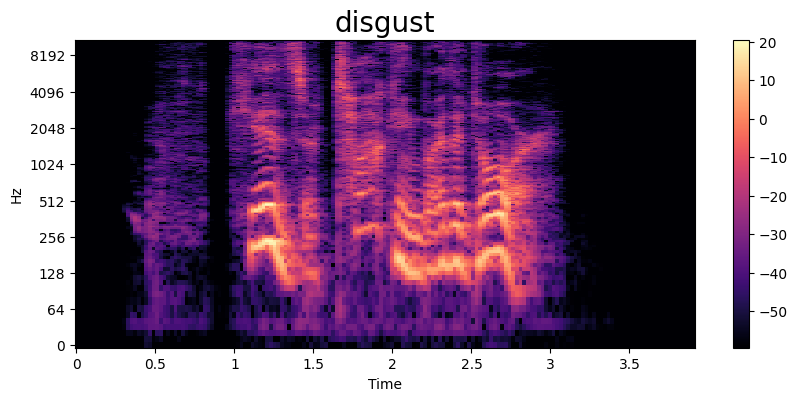

In [40]:
emotion = 'disgust'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

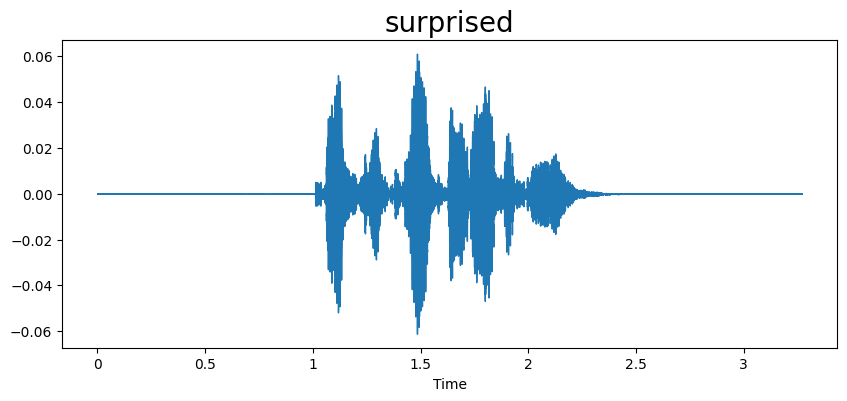

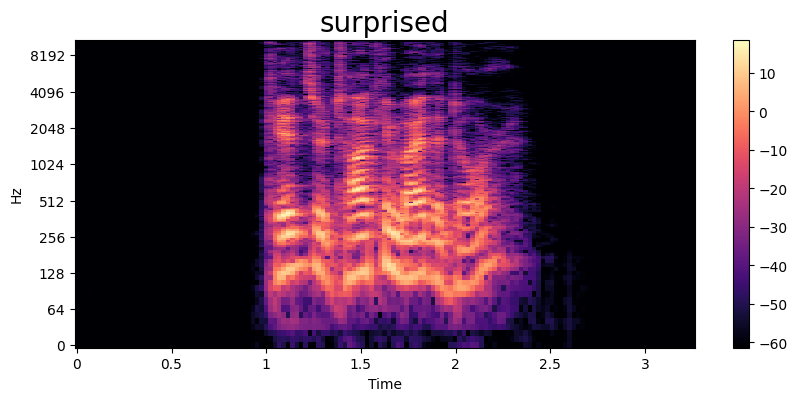

In [41]:
emotion = 'surprised'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

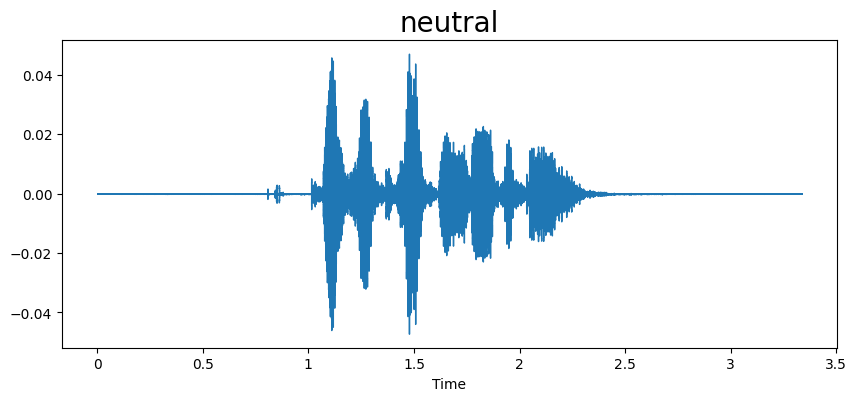

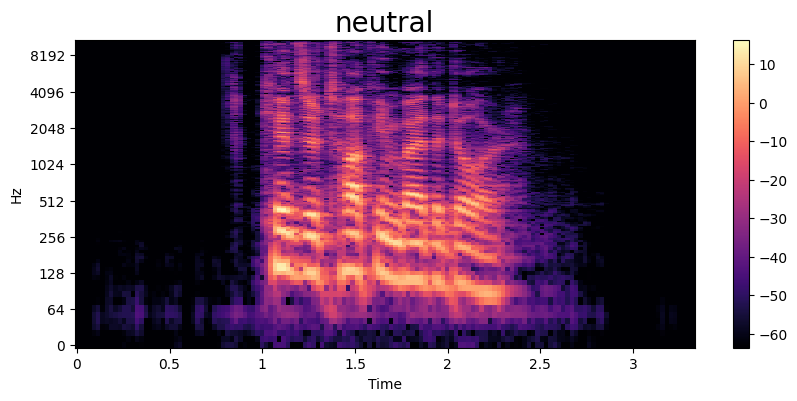

In [42]:
emotion = 'neutral'
path = np.array(df['file_path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [43]:
def extract_macc(filename):
    y, sr= librosa.load(filename, duration=3, offset=0.5)
    mfcc= np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [44]:
extract_macc(df['file_path'][0])

array([-6.7019543e+02,  6.5063850e+01,  8.8895434e-01,  1.4715980e+01,
        9.1821651e+00,  6.6057491e-01, -3.8468361e+00, -3.5839460e+00,
       -1.2959006e+01, -3.3001330e+00,  9.1077948e-01, -3.5970356e+00,
        2.3762741e+00, -4.3889413e+00,  5.4508036e-01,  8.9185160e-01,
       -4.8025908e+00, -2.1054139e+00, -1.6059692e+00, -1.0523902e+00,
       -7.0672808e+00, -6.2306112e-01, -2.7280293e+00, -5.3073611e+00,
       -1.9691166e+00, -9.4615275e-01, -5.7211108e+00,  3.3299103e-01,
       -2.5438454e+00,  1.8220848e-01, -2.3510976e+00, -2.5047269e+00,
       -3.1515074e+00, -2.1908991e+00, -3.8017597e+00, -1.8130877e+00,
       -1.2612224e+00, -2.1449544e+00, -4.1521735e+00, -1.7796154e+00],
      dtype=float32)

In [46]:
X_mfcc= df['file_path'].apply(lambda x: extract_macc(x))

In [47]:
X= [x for x in X_mfcc]
X = np.array(X)
print("Shape of X:", X.shape)

Shape of X: (1440, 40)


In [48]:
X=np.expand_dims(X, -1)
print("Shape of X after expansion:", X.shape)

Shape of X after expansion: (1440, 40, 1)


In [49]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
y= enc.fit_transform(df[['emotion']])

In [50]:
y= y.toarray()

In [51]:
y.shape

(1440, 8)

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(256, return_sequences=False, input_shape=(40,1)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,864 (1.17 MB)

 Trainable params: 305,864 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(X, y, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1395 - loss: 2.0695 - val_accuracy: 0.1597 - val_loss: 2.0536
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2199 - loss: 1.9870 - val_accuracy: 0.2639 - val_loss: 1.9656
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2459 - loss: 1.9348 - val_accuracy: 0.2812 - val_loss: 1.9409
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2880 - loss: 1.8758 - val_accuracy: 0.2882 - val_loss: 1.8947
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2854 - loss: 1.8692 - val_accuracy: 0.2917 - val_loss: 1.8965
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3050 - loss: 1.8248 - val_accuracy: 0.2778 - val_loss: 1.8434
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3088 - loss: 1.8370 - val_accuracy: 0.3125 - val_loss: 1.8694
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2845 - loss: 1.8249 - val_accuracy: 0.2778 - v

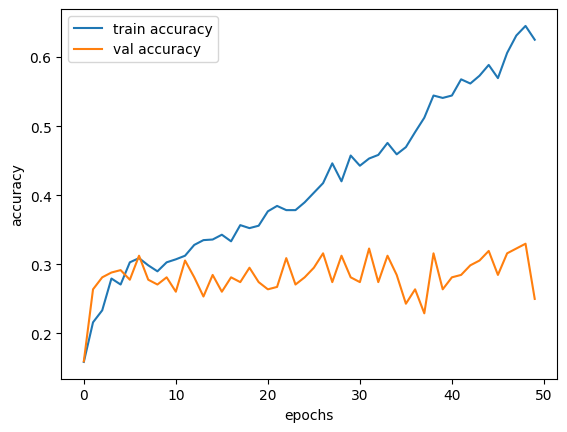

In [59]:
epochs=  list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

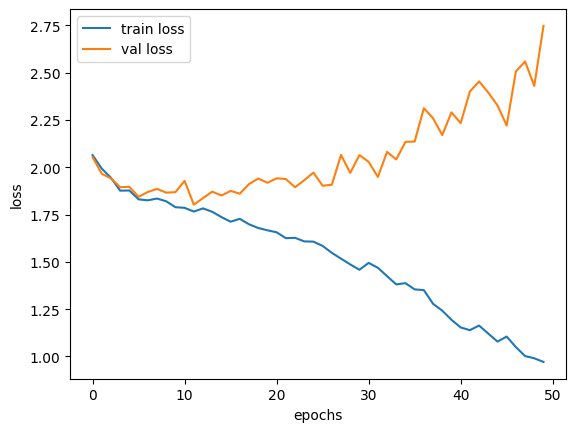

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [63]:
# Save your trained model to an HDF5 file
model.save('SEA_model.h5')